# Necessary Imports 

In [1]:
import numpy as np
import tifffile as tiff
import matplotlib.pyplot as plt
import os
import cv2
from scipy.stats import skew
import sys

import torch
import torchvision
import gc

# Importing Cell-APP

In [8]:
%load_ext autoreload
%autoreload 2


import importlib  
au = importlib.import_module("cell-AAP.cell_AAP.annotation.annotation_utils")
sys.path.append('/home/anishjv/cell_seg_classify/notebooks/cell-AAP/cell_AAP/annotation/')
sys.path.append('/home/anishjv/cell_seg_classify/notebooks/cell-AAP/')
ann = importlib.import_module("cell-AAP.cell_AAP.annotation.annotator")
dw = importlib.import_module("cell-AAP.cell_AAP.annotation.dataset_write")
cfg = importlib.import_module("cell-AAP.cell_AAP.configs")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading in SAM

In [3]:
sys.path.append("..")
from segment_anything import sam_model_registry, SamPredictor
from segment_anything.modeling import Sam

#Code below should be run if file is not already saved in path 
#!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

sam_checkpoint = "vit_l.pt"
model_type = "vit_l"
device = 'cuda'
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device = device)
predictor = SamPredictor(sam)

# Reading in EVICAN 
- Here we sorted for images of the same dimensions which is a requirement for cell-app processing. 

In [4]:
import glob
phs_files  = [
    f for f in glob.glob(
    '/home/anishjv/cell_seg_classify/notebooks/evican/EVICAN_val2019/*.jpg'
                        ) if 'Background' not in f and cv2.imread(f, cv2.IMREAD_GRAYSCALE).shape == (2160, 2160)
]
nuc_files = [
    f for f in glob.glob(
        '/home/anishjv/cell_seg_classify/notebooks/evican/EVICAN_val_masks/Nuclei/*.jpg'
                        ) if cv2.imread(f, cv2.IMREAD_GRAYSCALE).shape == (2160, 2160)
]

msk_files = [
    f for f in glob.glob(
        '/home/anishjv/cell_seg_classify/notebooks/evican/EVICAN_val_masks/Cells/*.jpg'
                        ) if cv2.imread(f, cv2.IMREAD_GRAYSCALE).shape == (2160, 2160)
]



In [5]:
print(len(phs_files), len(nuc_files), len(msk_files))

568 568 568


In [6]:
nuc_files_sub = nuc_files[0:100]
phs_files_sub = phs_files[0:100]
msk_files_sub = msk_files[0:100]

# Running Cell-APP
Here we ran cell-app on the evican dataset under 4 different regimes 
- We experimented with using 'mask' images as opposed to 'nuclear' images provided by EVICAN 
- We also experimented with using bounding box as opposed to point prompts for SAM 

In [9]:
%%time
configs = cfg.Cfg.get_config()
configs.frame_step = 1
configs.iou_thresh = 0.25
configs.pointprompts = True
configs.boxprompts = False


def sd_intensity(regionmask, intensity_image):
        return np.std(intensity_image[regionmask])
    
    
msk_points = ann.Annotator.get(configs,
                                   msk_files_sub,
                                   phs_files_sub
                     )

msk_points_df = msk_points.crop(predictor = predictor).gen_df(extra_props = (sd_intensity,))

The bounding box side length was 104.8975913588925 pixels
The bounding box side length was 102.27173078722134 pixels
The bounding box side length was 84.879681203941 pixels
The bounding box side length was 132.12645969417093 pixels
The bounding box side length was 219.5379600811836 pixels
The bounding box side length was 97.381534759886 pixels
The bounding box side length was 148.05221223755728 pixels
The bounding box side length was 60.88759348728697 pixels
The bounding box side length was 101.3919590168997 pixels
The bounding box side length was 251.92311950986792 pixels
The bounding box side length was 98.09957660744905 pixels
The bounding box side length was 178.34605126492747 pixels
The bounding box side length was 136.43831595619218 pixels
The bounding box side length was 926.2899211656475 pixels
The bounding box side length was 127.10013555087326 pixels
The bounding box side length was 60.76824251218866 pixels
The bounding box side length was 147.80288309468892 pixels
The boundi

In [8]:
%%time
configs.pointprompts = False
configs.boxprompts = True


msk_boxes = ann.Annotator.get(configs,
                                   msk_files_sub,
                                   phs_files_sub
                     )

msk_boxes_df = msk_boxes.crop(predictor = predictor).gen_df(extra_props = (sd_intensity,))

The bounding box side length was 104.8975913588925 pixels
The bounding box side length was 102.27173078722134 pixels
The bounding box side length was 84.879681203941 pixels
The bounding box side length was 132.12645969417093 pixels
The bounding box side length was 219.5379600811836 pixels
The bounding box side length was 97.381534759886 pixels
The bounding box side length was 148.05221223755728 pixels
The bounding box side length was 60.88759348728697 pixels
The bounding box side length was 101.3919590168997 pixels
The bounding box side length was 251.92311950986792 pixels
The bounding box side length was 98.09957660744905 pixels
The bounding box side length was 178.34605126492747 pixels
The bounding box side length was 136.43831595619218 pixels
The bounding box side length was 926.2899211656475 pixels
The bounding box side length was 127.10013555087326 pixels
The bounding box side length was 60.76824251218866 pixels
The bounding box side length was 147.80288309468892 pixels
The boundi

In [9]:
%%time
configs.pointprompts = True
configs.boxprompts = False

nuc_points = ann.Annotator.get(configs,
                                   nuc_files_sub,
                                   phs_files_sub
                     )

nuc_points_df = nuc_points.crop(predictor = predictor).gen_df(extra_props = (sd_intensity,))

The bounding box side length was 151.69632887363653 pixels
The bounding box side length was 114.71223535268557 pixels
The bounding box side length was 137.4839533835193 pixels
The bounding box side length was 156.65525702787733 pixels
The bounding box side length was 142.66506676594176 pixels
The bounding box side length was 185.89785755430128 pixels
The bounding box side length was 30.734877860002804 pixels
The bounding box side length was 70.43965497496654 pixels
The bounding box side length was 139.8123597157614 pixels
The bounding box side length was 82.21035359363667 pixels
The bounding box side length was 121.05615774979404 pixels
The bounding box side length was 62.30724049171063 pixels
The bounding box side length was 202.05037780377862 pixels
The bounding box side length was 110.50115501766797 pixels
The bounding box side length was 172.83038628755054 pixels
The bounding box side length was 189.09762118356582 pixels
The bounding box side length was 99.13548506997286 pixels
The

In [10]:
%%time
configs.pointprompts = False
configs.boxprompts = True


nuc_boxes = ann.Annotator.get(configs,
                                   nuc_files_sub,
                                   phs_files_sub
                     )

nuc_boxes_df = nuc_boxes.crop(predictor = predictor).gen_df(extra_props = (sd_intensity,))

The bounding box side length was 151.69632887363653 pixels
The bounding box side length was 114.71223535268557 pixels
The bounding box side length was 137.4839533835193 pixels
The bounding box side length was 156.65525702787733 pixels
The bounding box side length was 142.66506676594176 pixels
The bounding box side length was 185.89785755430128 pixels
The bounding box side length was 30.734877860002804 pixels
The bounding box side length was 70.43965497496654 pixels
The bounding box side length was 139.8123597157614 pixels
The bounding box side length was 82.21035359363667 pixels
The bounding box side length was 121.05615774979404 pixels
The bounding box side length was 62.30724049171063 pixels
The bounding box side length was 202.05037780377862 pixels
The bounding box side length was 110.50115501766797 pixels
The bounding box side length was 172.83038628755054 pixels
The bounding box side length was 189.09762118356582 pixels
The bounding box side length was 99.13548506997286 pixels
The

Below we find that utilizing 'mask' images from EVICAN results in better outcomes than using 'nuclear' images does.

In [11]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.3])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='red', facecolor=(0,0,0,0), lw=1))

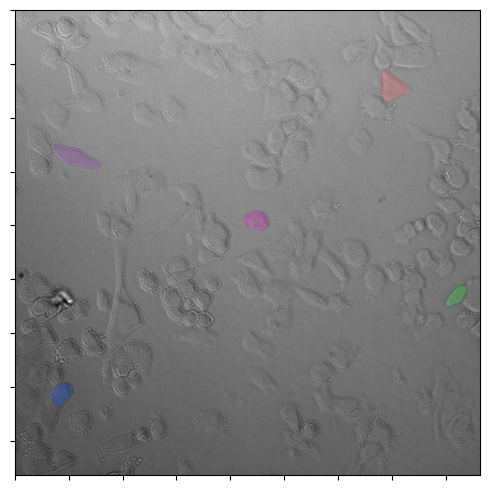

In [26]:
fig, ax = plt.subplots(ncols = 1, figsize = (5, 5))

index = 93
ax.imshow(au.bw_to_rgb(msk_points.phase_image_stack[index]))

for i, _ in enumerate(msk_points.segmentations[index]):
    mask = np.unpackbits(msk_points.segmentations[index][i], axis = 0, count = 2160)
    mask = np.array([mask]).astype('uint8')
    show_mask(mask, ax, random_color = True)


ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])

plt.tight_layout()


#fig.savefig('/home/anishjv/cell_seg_classify/sup_fig/487.png', dpi = 1000, transparent = True)

In [13]:
iou_msk_points = []
for i, mask_list in enumerate(msk_points.segmentations):
    unpacked_mask_list = [np.unpackbits(mask_list[i], axis = 0, count = 2160) for i,_ in enumerate(mask_list)]
    binary_result = sum(unpacked_mask_list) >0
    binary_truth = cv2.imread(msk_files_sub[i], cv2.IMREAD_GRAYSCALE) >0
    
    bintruth_area = np.count_nonzero(binary_truth == 1) 
    binres_area = np.count_nonzero(binary_result == 1)
    intersection = np.count_nonzero( np.logical_and( binary_result, binary_truth) )
    iou = intersection/(binres_area+bintruth_area-intersection)
    if iou != 0:
        iou_msk_points.append(iou)
    
        

In [14]:
iou_msk_boxes = []
for i, mask_list in enumerate(msk_boxes.segmentations):
    unpacked_mask_list = [np.unpackbits(mask_list[i], axis = 0, count = 2160) for i,_ in enumerate(mask_list)]
    binary_result = sum(unpacked_mask_list) > 0
    binary_truth = cv2.imread(msk_files_sub[i], cv2.IMREAD_GRAYSCALE) > 0
    
    bintruth_area = np.count_nonzero(binary_truth ==1) 
    binres_area = np.count_nonzero(binary_result ==1)
    intersection = np.count_nonzero( np.logical_and( binary_result, binary_truth) )
    iou = intersection/(binres_area+bintruth_area-intersection)
    if iou != 0:
        iou_msk_boxes.append(iou)

In [17]:
iou_nuc_points = []
for i, mask_list in enumerate(nuc_points.segmentations):
    unpacked_mask_list = [np.unpackbits(mask_list[i], axis = 0, count = 2160) for i,_ in enumerate(mask_list)]
    binary_result = sum(unpacked_mask_list) >0
    binary_truth = cv2.imread(msk_files_sub[i], cv2.IMREAD_GRAYSCALE) >0
    
    bintruth_area = np.count_nonzero(binary_truth == 1) 
    binres_area = np.count_nonzero(binary_result == 1)
    intersection = np.count_nonzero( np.logical_and( binary_result, binary_truth) )
    iou = intersection/(binres_area+bintruth_area-intersection)
    if iou != 0:
        iou_nuc_points.append(iou)

In [18]:
iou_nuc_boxes = []
for i, mask_list in enumerate(nuc_points.segmentations):
    unpacked_mask_list = [np.unpackbits(mask_list[i], axis = 0, count = 2160) for i,_ in enumerate(mask_list)]
    binary_result = sum(unpacked_mask_list) >0
    binary_truth = cv2.imread(msk_files_sub[i], cv2.IMREAD_GRAYSCALE) >0
    
    bintruth_area = np.count_nonzero(binary_truth == 1) 
    binres_area = np.count_nonzero(binary_result == 1)
    intersection = np.count_nonzero( np.logical_and( binary_result, binary_truth) )
    iou = intersection/(binres_area+bintruth_area-intersection)
    if iou != 0:
        iou_nuc_boxes.append(iou)

In [15]:
np.mean(iou_msk_points)

0.568016507075049

In [16]:
np.mean(iou_msk_boxes)

0.568016507075049

In [19]:
np.mean(iou_nuc_points)

0.3590894154025851

In [21]:
np.mean(iou_nuc_boxes)

0.3590894154025851